# Modelisation de la segregation

inspiration: https://ncase.me/polygons/ 

Le but de ce TD est de refaire cette modélisation de la ségrégation.
Si vous le voulez, vous pouvez essayer de le faire par vous même. Sinon, ce notebook est là pour vous aider, étape par étape.

Pour chaque fonction que vous codez, essayez d'évaluer la complexité de votre implémentation.

In [1]:
%matplotlib inline
# explication de cette ligne en fin de TD

## 1. Modélisation du monde dans l'état initial

Premièrement, il faut construire le monde dans lequel évolueront les populations. Pour cela, nous allons créer une classe `World`. Le monde sera représenté par un numpy array de 2 dimension (= une matrice), stocké dans l'attribut `grid` de cette classe. Pour l'instant, écrivez cette classe avec uniquement le constructeur. Ce dernier prendra en argument la hauteur de la grille `height`, créera la grille de la bonne hauteur et la stockera dans l'attribut `grid`. Cette grille sera initialisé avec des 0.

**Indice**: regarder la fonction zeros de numpy. Attention, elle renvoit des `float`, donc vous devrez convertir le résultat en `int` avec la méthode astype des `arrays`.

**Convention**: on abrège numpy par np. Vous pouvez mettre ceci dans le code avec la ligne de code `import numpy as np`. Ainsi, vous devrez écrire `np.array` au lieu de `numpy.array`.

In [2]:
# Votre classe ici
import numpy as np

class World:
    
    def __init__(self, height):
        self.grid = np.zeros((height, height)).astype(int)

In [3]:
# Test du constructeur
test = World(height=10)
if test.grid.shape != (10, 10):
    print("Votre grille n'est pas de la bonne taille.")
if not(np.all(test.grid == 0)):
    print("Votre grille ne contient pas que des zéros.")

Nous allons chercher à remplir aléatoirement la grille avec des habitants. Pour cela, commencons par écrire une fonction `fill_randomly` prenant en argument un array `arr`, un élément `e` et un nombre `n`, et qui insère dans `arr` `n` fois l'élément `e` à des positions aléatoires.

Attention, la fonction ne doit rien retourner, mais dois agir directement sur `arr`. De plus, elle ne doit remplacer que des 0. Si il n'y a pas assez de 0 dans `arr`, elle renvoit une erreur `ValueError('Not enough place')`. 

Vous pourrez utiliser les fonctions contenu dans `numpy.random`.

**Indice 1**: commencez par extraire la position de tous les 0 dans `arr`.

**Indice 2**: une fois que avez testé si il y a assez de place, vous pouvez utiliser la fonction `shuffle` de `numpy.random` pour mélanger les positions, puis choisir les `n` premières pour mettre `elem`.

In [4]:
# Votre code ici

def fill_randomly(arr, elem, n):
    pos = np.where(arr == 0)
    pos = list(zip(pos[0], pos[1]))
    if len(pos) < n:
        raise ValueError('Not enough place')
    np.random.shuffle(pos)
    for x, y in pos[:n]:
        arr[x, y] = elem

In [5]:
# Test de la fonction fill_randomly
arr = np.zeros((10, 10))
fill_randomly(arr, 1, 5)
if np.sum(arr == 1) != 5:
    print('Vous avez une erreur')
fill_randomly(arr, 2, 95)
if np.sum(arr == 0):
    print('Vous avez remplacer un 1')
try:
    fill_randomly(arr, 3, 1)
    print("Vous ne renvoyer pas d'erreur quand il n'y a plus de place")
except:
    pass

Nous allons maintenant intégrer dans notre classe `World` une fonction pour remplir le monde d'habitants. Pour cela, écrivez une méthode `fill_world` qui prendra en argument le nombre de populations différentes `n_pop`, ainsi que pour chaque population le pourcentage de la grille à remplir. Ceci sera modélisé par une liste `percent_pop` de taille `n_pop` dont la somme devra être inférieur à 1.

Par exemple, `test.fill_world(2, [0.1, 0.5])` remplira la `grid` de test avec 10% de 1 et 50% de 2.  
Attention: si on appelle ensuite `test.fill_world(1, [0.2])`, la `grid` de test contiendra 20% de 3!

**Indice**: vous allez devoir sauvegarder le dernier nombre utilisé pour représenter une population. Pour ce faire, modifier le constructeur !

Vous pouvez copier coller le code de la classe World dans la cellule suivante.

In [6]:
# Votre classe ici
import numpy as np

class World:
    
    def __init__(self, height):
        self.grid = np.zeros((height, height)).astype(int)
        self.n_cases = height ** 2
        self.next_pop = 1
        
    def fill_world(self, n_pop, percent_pop):
        if len(percent_pop) != n_pop:
            raise ValueError(f'percent_pop is of length {len(percent_pop)}, but expected {n_pop} !')
        for i in range(n_pop):
            n_to_fill = int(self.n_cases * percent_pop[i])
            fill_randomly(self.grid, self.next_pop, n_to_fill)
            self.next_pop += 1

In [7]:
# Test de la méthode fill_world
test = World(10)
test.fill_world(3, [0.1, 0.1, 0.1])
for i in range(1, 4):
    if np.sum(test.grid == i) != 10:
        print('Vous avez une erreur !')
test.fill_world(1, [0.5])
if np.sum(test.grid == 4) != 50:
    print('Vous avez une erreur quand on appelle plusieurs fois la fonction !')
try:
    test.fill_world(1, [0.5])
    print('Vous ne gérez pas bien le manque de place !')
except:
    pass

Pour finir, créer une fonction create_world, qui prendra en argument la taille de la grid `height`, le nombre de population `n_pop`, et `percent_pop` définit comme dans fill_world, et qui renverra le monde créé. `n_pop` aura une valeur par défaut de `2`, et `percent_pop` aura une valeur par défaut de `[0.4, 0.4]`. 

In [8]:
def create_world(height, n_pop=2, percent_pop=[0.4, 0.4]):
    world = World(height)
    world.fill_world(n_pop, percent_pop)
    return world

In [9]:
# Test de create_world

world = create_world(10)
if np.sum(world.grid == 1) == 40 and np.sum(world.grid == 2) == 40:
    print('Fin de la partie 1')
else:
    print('Vous avez une erreur')

Fin de la partie 1


## 2. Trouvons qui est malheureux

La prochaine étape est de savoir qui veux déménager. Pour cela, il faut déjà définir une condition. Pour l'instant, cette condition sera fixé et vous pourrez la coder en dur (pas besoin de mettre de paramètre en argument). Disons que quelqu'un veut déménager si strictement plus de 50% de ses voisins sont différents.

Les cases du centre ont 8 voisins: sur les côtés et sur les diagonales!

Commencons par écrire une fonction `want_to_move` qui, à partir d'une grille et d'une position, renvoit `True` si la personne veut déménager et `False` sinon. La grille est un numpy array, la position est un 2-uple.

**Note**: si une personne n'a pas de voisins, elle ne veut pas déménager. Si on appelle cette fonction sur une case vide, elle renvoit `False`.

In [10]:
def want_to_move(grid, pos):
    x, y = pos
    inhabitant = grid[x, y]
    if inhabitant == 0:
        return False
    n_neighboor = 0
    n_same_neighboor = 0
    for i in [-1, 0, 1]:
        if x + i >= 0 and x + i < grid.shape[0]:
            for j in [-1, 0, 1]:
                if y + j >= 0 and y + j < grid.shape[1] and (i != 0 or j != 0):
                    n_neighboor += grid[x+i, y+j] != 0
                    n_same_neighboor += grid[x+i, y+j] == inhabitant
    return n_neighboor != 0 and n_same_neighboor / n_neighboor < 0.5

In [11]:
# Test de want_to_move
test = create_world(10)
test.grid = np.load('./test_world.npy')
print(test.grid)
sol = np.load('wants_to_move.npy')
pred = np.array([want_to_move(test.grid, (x, y)) for x in range(10) for y in range(10)])
print(f' Vous avez raison à {np.mean(sol == pred)*100}%')

[[2 2 2 1 2 2 2 2 0 2]
 [1 0 2 2 1 1 0 0 0 2]
 [2 1 2 1 1 2 1 1 1 1]
 [1 2 0 0 2 2 2 2 2 1]
 [1 0 1 1 0 2 1 2 1 1]
 [1 2 1 1 2 2 1 1 1 0]
 [0 1 2 2 0 1 0 2 2 1]
 [1 2 0 2 1 0 0 1 1 0]
 [2 2 1 2 1 0 0 2 2 2]
 [1 2 1 1 1 1 1 2 0 2]]
 Vous avez raison à 100.0%


Maintenant que nous avons cette fonction, écrivons une fonction qui renvoie une personne aléatoire qui à envie de déménager ainsi que la position d'un espace libre. Cette fonction sera nommé `next_move`, et prendra en argument un numpy array `grid`.

Nous supposons dans cette fonction que quelqu'un veut déménager et qu'il y a au moins une place de libre.

**Indice**: aidez vous de la fonction `fill_randomly`.

In [12]:
def next_move(grid):
    possible_pos = [(x, y) for x in range(grid.shape[0]) for y in range(grid.shape[1])]
    move_from = None
    move_to = None
    np.random.shuffle(possible_pos)
    for pos in possible_pos:
        if move_from is None and want_to_move(grid, pos):
            move_from = pos
        if move_to is None and grid[pos] == 0:
            move_to = pos
        if move_from is not None and move_to is not None:
            break
    return (move_from, move_to)

In [13]:
# Test de next_move
move_from, move_to = next_move(test.grid)
if not(want_to_move(test.grid, move_from)) or test.grid[move_to] != 0:
    print('Vous avez une erreur')

## 3. Finalisons le programme

Il nous manque que très peu de chose pour avoir un programme qui fonctionne. Il nous manque une fonction pour savoir si la grille est finie(=plus personne ne veut bouger), une fonction pour effectuer un déplacement et une fonction pour boucler tant qu'elle ne l'est pas.

Commencons par le déplacement. Cette fonction sera la méthode `move` de World. Vous pouvez donc refaire un copier coller. Elle prendra en argument une position initiale, une position finale, et intervertira ces deux positions. 

In [14]:
# Votre classe ici
import numpy as np

class World:
    
    def __init__(self, height):
        self.grid = np.zeros((height, height)).astype(int)
        self.n_cases = height ** 2
        self.next_pop = 1
        
    def fill_world(self, n_pop, percent_pop):
        if len(percent_pop) != n_pop:
            raise ValueError(f'percent_pop is of length {len(percent_pop)}, but expected {n_pop} !')
        for i in range(n_pop):
            n_to_fill = int(self.n_cases * percent_pop[i])
            fill_randomly(self.grid, self.next_pop, n_to_fill)
            self.next_pop += 1
            
    def move(self, move_from, move_to):
        tmp = self.grid[move_to]
        self.grid[move_to] = self.grid[move_from]
        self.grid[move_from] = tmp

In [15]:
# Test de want_to_move
test = create_world(10)
test.grid = np.load('./test_world.npy')
test.move((0, 0), (9, 8))
if test.grid[0, 0] != 0 or test.grid[9, 8] != 2:
    print('Vous avez une erreur')

Ecrivons les deux dernières fonctions. La première sera `is_complete` et prendra en argument un numpy array `grid`. La seconde sera `run_simulation` et prendra comme argument une instance de la classe `World`, ainsi qu'un nombre maximal d'itération `iter_max`. Celui-ci aura par défaut une valeur de 100, et aura pour rôle d'empécher que la fonction tourne indéfiniment. Il définit en effet le nombre maximal de déplacement que l'on peut faire.

`run_simulation` affichera le numéro de l'itération en cours à chaque début de boucle, ainsi que le temps pris pour faire l'itération à la fin de chaque boucle. Pour cela, vous aurez besoin du package `time`.  
La fonction renverra `True` si le monde est stable, `False` sinon.

In [16]:
import time

def is_complete(grid):
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if want_to_move(grid, (x, y)):
                return False
    return True


def run_simulation(world, iter_max=100):
    for n_iter in range(iter_max):
        print(f'Iteration {n_iter + 1}')
        t0 = time.time()
        move_from, move_to = next_move(world.grid)
        world.move(move_from, move_to)
        if is_complete(world.grid):
            return True
        t1 = time.time()
        print(f'Done in {t1-t0} secondes.')
    return False

In [17]:
test = create_world(10)
test.grid = np.load('./test_world.npy')
run_simulation(test)
print(test.grid)

Iteration 1
Done in 0.0005979537963867188 secondes.
Iteration 2
Done in 0.0008378028869628906 secondes.
Iteration 3
Done in 0.0006320476531982422 secondes.
Iteration 4
Done in 0.0005829334259033203 secondes.
Iteration 5
Done in 0.0004782676696777344 secondes.
Iteration 6
Done in 0.0006949901580810547 secondes.
Iteration 7
Done in 0.0005731582641601562 secondes.
Iteration 8
Done in 0.0004639625549316406 secondes.
Iteration 9
Done in 0.0012080669403076172 secondes.
Iteration 10
Done in 0.0008878707885742188 secondes.
Iteration 11
Done in 0.0004918575286865234 secondes.
Iteration 12
Done in 0.0003409385681152344 secondes.
Iteration 13
Done in 0.0003688335418701172 secondes.
Iteration 14
Done in 0.0010509490966796875 secondes.
Iteration 15
Done in 0.0005478858947753906 secondes.
Iteration 16
Done in 0.0004107952117919922 secondes.
Iteration 17
Done in 0.0006299018859863281 secondes.
Iteration 18
Done in 0.00029778480529785156 secondes.
Iteration 19
Done in 0.0010199546813964844 secondes.
I

## 4. Analyse des résultats

Maintenant que nous avons un programme fonctionnel, examinons les résultats. Cela peut se faire à deux niveaux.  
Tout d'abord, restons dans notre problème et examinons la ségrégation dans ce monde. Pour ce faire, nous pouvons utiliser plusieurs métriques. Par exemple, nous pouvons regarder quel est le pourcentage d'habitants ayant au moins un voisin différent. Nous pourrions aussi décider de regarder le pourcentage moyen de voisins différents. 

Implémenter une de ces métriques, d'abord pour un individu dans une grille (fonction ayant pour argument `grid` et une position `pos`), puis dans la classe `World`, travaillant sur toute la grille et donnant la métrique moyenne. N'oubliez pas de tester vos fonctions.

In [18]:
# La métrique
def has_a_different_neighbor(grid, pos):
    x, y = pos
    inhabitant = grid[x, y]
    for i in [-1, 0, 1]:
        if x + i >= 0 and x + i < grid.shape[0]:
            for j in [-1, 0, 1]:
                if y + j >= 0 and y + j < grid.shape[1] and (i != 0 or j != 0):
                    if grid[x+i, y+j] != inhabitant and grid[x+i, y+j] != 0:
                        return True
    return False

In [19]:
# Test de la métrique
test = create_world(10)
test.grid = np.load('./test_world.npy')
test.move((4, 6), (4, 7))
test.move((5, 6), (6, 7))
print(test.grid)
print(has_a_different_neighbor(test.grid, (0, 0)))
print(has_a_different_neighbor(test.grid, (9, 9)))
print(has_a_different_neighbor(test.grid, (4, 5)))
print(has_a_different_neighbor(test.grid, (4, 6)))

[[2 2 2 1 2 2 2 2 0 2]
 [1 0 2 2 1 1 0 0 0 2]
 [2 1 2 1 1 2 1 1 1 1]
 [1 2 0 0 2 2 2 2 2 1]
 [1 0 1 1 0 2 2 1 1 1]
 [1 2 1 1 2 2 2 1 1 0]
 [0 1 2 2 0 1 0 1 2 1]
 [1 2 0 2 1 0 0 1 1 0]
 [2 2 1 2 1 0 0 2 2 2]
 [1 2 1 1 1 1 1 2 0 2]]
True
False
False
True


In [20]:
# La classe World
class World:
    
    def __init__(self, height):
        self.grid = np.zeros((height, height)).astype(int)
        self.n_cases = height ** 2
        self.next_pop = 1
        
    def fill_world(self, n_pop, percent_pop):
        if len(percent_pop) != n_pop:
            raise ValueError(f'percent_pop is of length {len(percent_pop)}, but expected {n_pop} !')
        for i in range(n_pop):
            n_to_fill = int(self.n_cases * percent_pop[i])
            fill_randomly(self.grid, self.next_pop, n_to_fill)
            self.next_pop += 1
            
    def move(self, move_from, move_to):
        tmp = self.grid[move_to]
        self.grid[move_to] = self.grid[move_from]
        self.grid[move_from] = tmp
        
    def compute_segregation(self):
        n_inhabitants = 0
        n_segregated = 0
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                if self.grid[i, j] != 0:
                    n_inhabitants += 1
                    n_segregated += (1 - has_a_different_neighbor(self.grid, (i, j)))
        return n_segregated / n_inhabitants

In [21]:
# Test de la classe World
test = create_world(10)
print(f'segregation: {test.compute_segregation()}')
run_simulation(test)
print(test.grid)
print(f'segregation: {test.compute_segregation()}')

segregation: 0.0875
Iteration 1
Done in 0.0019321441650390625 secondes.
Iteration 2
Done in 0.0007741451263427734 secondes.
Iteration 3
Done in 0.0003311634063720703 secondes.
Iteration 4
Done in 0.0004038810729980469 secondes.
Iteration 5
Done in 0.0003108978271484375 secondes.
Iteration 6
Done in 0.0006592273712158203 secondes.
Iteration 7
Done in 0.0003521442413330078 secondes.
Iteration 8
Done in 0.00026917457580566406 secondes.
Iteration 9
Done in 0.00028896331787109375 secondes.
Iteration 10
Done in 0.0012652873992919922 secondes.
Iteration 11
Done in 0.000993967056274414 secondes.
Iteration 12
Done in 0.0009980201721191406 secondes.
Iteration 13
Done in 0.0021572113037109375 secondes.
Iteration 14
Done in 0.002379179000854492 secondes.
Iteration 15
Done in 0.001561880111694336 secondes.
Iteration 16
Done in 0.002928018569946289 secondes.
Iteration 17
Done in 0.0018310546875 secondes.
Iteration 18
Done in 0.0017769336700439453 secondes.
Iteration 19
Done in 0.0013959407806396484 

Vous pouvez maintenant changer la fonction `run_simulation` pour qu'elle renvoit l'évolution de la ségrégation au cours du temps. Pour ce faire, calculer celle-ci à chaque itération, et renvoyer une liste avec ces résultats, en plus de `True` ou `False`.

In [22]:
def run_simulation(world, iter_max=100):
    segregs = [world.compute_segregation()]
    for n_iter in range(iter_max):
        print(f'Iteration {n_iter + 1}')
        t0 = time.time()
        move_from, move_to = next_move(world.grid)
        world.move(move_from, move_to)
        segregs.append(world.compute_segregation())
        if is_complete(world.grid):
            return True, segregs
        t1 = time.time()
        print(f'Done in {t1-t0} secondes.')
    return False, segregs

In [23]:
# Test de la classe World
test = create_world(10)
res, segregs = run_simulation(test)
print(test.grid)
print(segregs)

Iteration 1
Done in 0.0008308887481689453 secondes.
Iteration 2
Done in 0.00036406517028808594 secondes.
Iteration 3
Done in 0.0006721019744873047 secondes.
Iteration 4
Done in 0.0010318756103515625 secondes.
Iteration 5
Done in 0.0005419254302978516 secondes.
Iteration 6
Done in 0.0005309581756591797 secondes.
Iteration 7
Done in 0.0005741119384765625 secondes.
Iteration 8
Done in 0.00043010711669921875 secondes.
Iteration 9
Done in 0.0004253387451171875 secondes.
Iteration 10
Done in 0.0004947185516357422 secondes.
Iteration 11
Done in 0.0004949569702148438 secondes.
Iteration 12
Done in 0.0007240772247314453 secondes.
Iteration 13
Done in 0.0008559226989746094 secondes.
Iteration 14
Done in 0.0007691383361816406 secondes.
Iteration 15
Done in 0.000881195068359375 secondes.
Iteration 16
Done in 0.00037097930908203125 secondes.
Iteration 17
Done in 0.0007338523864746094 secondes.
Iteration 18
Done in 0.0009479522705078125 secondes.
Iteration 19
Done in 0.0005910396575927734 secondes.


Pour finir, sur cette première analyse, tracer l'évolution de la ségrégation grâce à `matplotlib.pyplot`. Par convention, importez le et renommez le en `plt`. Vous pourrez alors utiliser les fonctions `plot` et `show`.

**Note**: la première ligne de code de ce notebook `%matplotlib inline`, permet d'afficher les graphiques dans les notebooks.

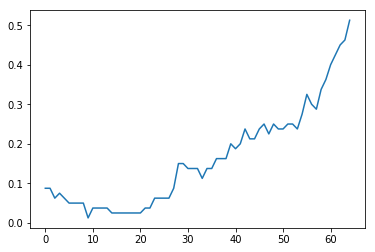

In [24]:
from matplotlib import pyplot as plt

plt.plot(segregs)
plt.show()

Passons à la deuxième étape de l'analyse. Analysons les performances du programme en fonction de la taille de l'input. Pour cela, dans la fonction `run_simulation`, renvoyer le temps moyen d'une itération.

In [25]:
def run_simulation(world, iter_max=100):
    segregs = [world.compute_segregation()]
    time_iter = []
    for n_iter in range(iter_max):
        print(f'Iteration {n_iter + 1}')
        t0 = time.time()
        move_from, move_to = next_move(world.grid)
        world.move(move_from, move_to)
        segregs.append(world.compute_segregation())
        if is_complete(world.grid):
            return True, segregs, np.mean(time_iter)
        t1 = time.time()
        time_iter.append(t1 - t0)
        print(f'Done in {t1-t0} secondes.')
    return False, segregs, np.mean(time_iter)

In [26]:
test = create_world(10)
res, segregs, mean_time = run_simulation(test)
print(test.grid)
print(segregs)
print(mean_time)

Iteration 1
Done in 0.0006268024444580078 secondes.
Iteration 2
Done in 0.0004050731658935547 secondes.
Iteration 3
Done in 0.00041294097900390625 secondes.
Iteration 4
Done in 0.00034308433532714844 secondes.
Iteration 5
Done in 0.0005388259887695312 secondes.
Iteration 6
Done in 0.0006649494171142578 secondes.
Iteration 7
Done in 0.0008609294891357422 secondes.
Iteration 8
Done in 0.0005877017974853516 secondes.
Iteration 9
Done in 0.0013360977172851562 secondes.
Iteration 10
Done in 0.0013759136199951172 secondes.
Iteration 11
Done in 0.0019001960754394531 secondes.
Iteration 12
Done in 0.0013546943664550781 secondes.
Iteration 13
Done in 0.0010678768157958984 secondes.
Iteration 14
Done in 0.0008280277252197266 secondes.
Iteration 15
Done in 0.0012061595916748047 secondes.
Iteration 16
Done in 0.0007443428039550781 secondes.
Iteration 17
Done in 0.0006139278411865234 secondes.
Iteration 18
Done in 0.0007658004760742188 secondes.
Iteration 19
Done in 0.0012319087982177734 secondes.


Enfin, écrivez une fonction `evaluate_perf`, qui prend en entré une liste de taille de grille, qui compile le temps moyen d'une itération pour chaque grille, et qui trace ce temps moyen en fonction de la taille de la grille.

In [27]:
def evaluate_perf(sizes):
    mean_times = []
    for size in sizes:
        print(f'Working with size {size}')
        world = create_world(size)
        _, _, mean_time = run_simulation(world)
        mean_times.append(mean_time)
    plt.scatter(sizes, mean_times)
    plt.show()

Working with size 5
Iteration 1
Done in 0.00034999847412109375 secondes.
Iteration 2
Done in 0.0004208087921142578 secondes.
Iteration 3
Done in 0.00047469139099121094 secondes.
Iteration 4
Done in 0.0003261566162109375 secondes.
Iteration 5
Done in 0.00039196014404296875 secondes.
Iteration 6
Done in 0.0003409385681152344 secondes.
Iteration 7
Done in 0.000911712646484375 secondes.
Iteration 8
Done in 0.0005688667297363281 secondes.
Iteration 9
Done in 0.0006058216094970703 secondes.
Iteration 10
Done in 0.0005567073822021484 secondes.
Iteration 11
Done in 0.0005772113800048828 secondes.
Iteration 12
Done in 0.0010478496551513672 secondes.
Iteration 13
Done in 0.0013020038604736328 secondes.
Iteration 14
Done in 0.0009140968322753906 secondes.
Iteration 15
Working with size 10
Iteration 1
Done in 0.0003230571746826172 secondes.
Iteration 2
Done in 0.0002980232238769531 secondes.
Iteration 3
Done in 0.0003018379211425781 secondes.
Iteration 4
Done in 0.0005190372467041016 secondes.
Ite

Done in 0.00757908821105957 secondes.
Iteration 8
Done in 0.006555080413818359 secondes.
Iteration 9
Done in 0.00653386116027832 secondes.
Iteration 10
Done in 0.0062007904052734375 secondes.
Iteration 11
Done in 0.006525993347167969 secondes.
Iteration 12
Done in 0.0068972110748291016 secondes.
Iteration 13
Done in 0.007130861282348633 secondes.
Iteration 14
Done in 0.007033109664916992 secondes.
Iteration 15
Done in 0.008858203887939453 secondes.
Iteration 16
Done in 0.008356809616088867 secondes.
Iteration 17
Done in 0.007434844970703125 secondes.
Iteration 18
Done in 0.006793022155761719 secondes.
Iteration 19
Done in 0.007035970687866211 secondes.
Iteration 20
Done in 0.006779193878173828 secondes.
Iteration 21
Done in 0.006962299346923828 secondes.
Iteration 22
Done in 0.007681131362915039 secondes.
Iteration 23
Done in 0.009102106094360352 secondes.
Iteration 24
Done in 0.0069789886474609375 secondes.
Iteration 25
Done in 0.007030963897705078 secondes.
Iteration 26
Done in 0.007

Done in 0.027796030044555664 secondes.
Iteration 68
Done in 0.028273820877075195 secondes.
Iteration 69
Done in 0.024245023727416992 secondes.
Iteration 70
Done in 0.02544116973876953 secondes.
Iteration 71
Done in 0.02506232261657715 secondes.
Iteration 72
Done in 0.026434898376464844 secondes.
Iteration 73
Done in 0.026370763778686523 secondes.
Iteration 74
Done in 0.028382062911987305 secondes.
Iteration 75
Done in 0.024770021438598633 secondes.
Iteration 76
Done in 0.022330284118652344 secondes.
Iteration 77
Done in 0.021660327911376953 secondes.
Iteration 78
Done in 0.0216672420501709 secondes.
Iteration 79
Done in 0.026144027709960938 secondes.
Iteration 80
Done in 0.026263713836669922 secondes.
Iteration 81
Done in 0.02538299560546875 secondes.
Iteration 82
Done in 0.024444103240966797 secondes.
Iteration 83
Done in 0.025629043579101562 secondes.
Iteration 84
Done in 0.022388935089111328 secondes.
Iteration 85
Done in 0.023140907287597656 secondes.
Iteration 86
Done in 0.0299079

Done in 0.25600099563598633 secondes.
Iteration 28
Done in 0.24548101425170898 secondes.
Iteration 29
Done in 0.24962997436523438 secondes.
Iteration 30
Done in 0.24137330055236816 secondes.
Iteration 31
Done in 0.24255800247192383 secondes.
Iteration 32
Done in 0.23501920700073242 secondes.
Iteration 33
Done in 0.24251389503479004 secondes.
Iteration 34
Done in 0.26956892013549805 secondes.
Iteration 35
Done in 0.2640659809112549 secondes.
Iteration 36
Done in 0.24538588523864746 secondes.
Iteration 37
Done in 0.26466989517211914 secondes.
Iteration 38
Done in 0.24467992782592773 secondes.
Iteration 39
Done in 0.26836204528808594 secondes.
Iteration 40
Done in 0.25492286682128906 secondes.
Iteration 41
Done in 0.24974393844604492 secondes.
Iteration 42
Done in 0.26167917251586914 secondes.
Iteration 43
Done in 0.2562370300292969 secondes.
Iteration 44
Done in 0.26010584831237793 secondes.
Iteration 45
Done in 0.25774312019348145 secondes.
Iteration 46
Done in 0.25572991371154785 secon

Done in 0.5012800693511963 secondes.
Iteration 91
Done in 0.4931039810180664 secondes.
Iteration 92
Done in 0.4869551658630371 secondes.
Iteration 93
Done in 0.5317349433898926 secondes.
Iteration 94
Done in 0.48217320442199707 secondes.
Iteration 95
Done in 0.4982142448425293 secondes.
Iteration 96
Done in 0.48423194885253906 secondes.
Iteration 97
Done in 0.5211310386657715 secondes.
Iteration 98
Done in 0.48325395584106445 secondes.
Iteration 99
Done in 0.5093958377838135 secondes.
Iteration 100
Done in 0.49396395683288574 secondes.
Working with size 500
Iteration 1
Done in 0.8184709548950195 secondes.
Iteration 2
Done in 0.8265752792358398 secondes.
Iteration 3
Done in 0.8074710369110107 secondes.
Iteration 4
Done in 0.7725179195404053 secondes.
Iteration 5
Done in 0.7849328517913818 secondes.
Iteration 6
Done in 0.763329029083252 secondes.
Iteration 7
Done in 0.7717218399047852 secondes.
Iteration 8
Done in 0.8138830661773682 secondes.
Iteration 9
Done in 0.8778848648071289 second

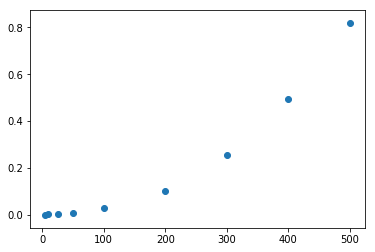

In [28]:
# Attention, c'est long !
evaluate_perf([5, 10, 25, 50, 100, 200, 300, 400, 500])

## Pour aller plus loin

Vous pouvez ajouter ce que vous voulez à ce programme. Néanmoins, voici quelques pistes:
- mettre un argument `verbose` dans `run_simulation` pour controler l'affichage des itérations/temps par itération
- passer le tout en fichier et faire une meilleure architecture
- passer le seuil de mécontentement en paramètre pour pouvoir le faire varier
- ajouter un seuil de mécontentement de l'autre côté du spectre: quelqu'un démanage si moins de X% de ses voisins sont différents
- créer un système pour suivre l'évolution du monde au fur et à mesure de la simulation

Enfin, il y a une grosse amélioration à faire en terme de performance. Pour l'instant, on cherche sur toute la grille si quelqu'un veut déménager, les espaces libres, ... Vous pouvez améliorer ceci en conservant dans une liste ou une file les gens malheureux ainsi que les espaces libres, et en mettant à jour cette liste à chaque étape. La complexité en sera fortement réduite!